# Imports

In [ ]:
# linear algebra stuff
import numpy as np
import torch

# mainly loading and saving tabular data
import pandas as pd

# plotting data
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LogisticRegression

# this just makes nice-looking loading bars
from tqdm import tqdm

# Load in the dataset

load datasets in and prepare them

In [ ]:
train_path = '/content/train.csv'
test_path = '/content/test.csv'

In [ ]:
# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

##prepare data by excluding id from both
# Define the features and target for the training set
X_train = train_df.drop(columns=['id', 'loan_status'])
y_train = train_df['loan_status']

# Define the features for the test set (no target in test.csv)
X_test = test_df.drop(columns=['id'])

##note that when creating the eval file we will want to use the ids
##so for saving data use test_df instead of x_test

inspect data for shape and missing columns

In [ ]:
print("Training set:")
X_train.head()

Training set:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [ ]:
print("Training Answers:")
y_train.head()

Training Answers:


,loan_status
0,0
1,0
2,0
3,0
4,0


In [ ]:
print("Test set:")
X_test.head()

Test set:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


# Visualize Data



Simple Visuliztion of  features our model will use to make predictions

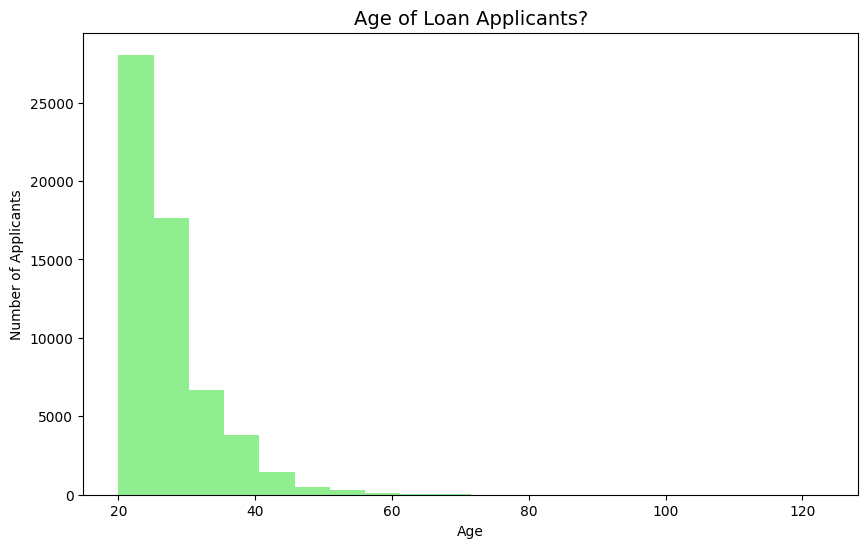

In [ ]:
#Histogram of Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(train_df['person_age'], bins=20, color='lightgreen')
plt.title('Age of Loan Applicants?', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.show()

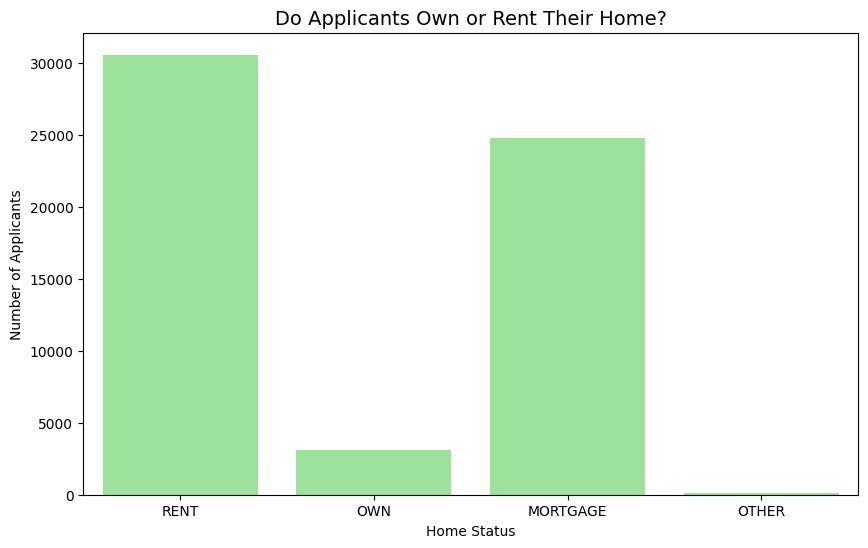

In [ ]:
#Bar Chart of Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='person_home_ownership', color='lightgreen')
plt.title('Do Applicants Own or Rent Their Home?', fontsize=14)
plt.xlabel('Home Status')
plt.ylabel('Number of Applicants')
plt.show()


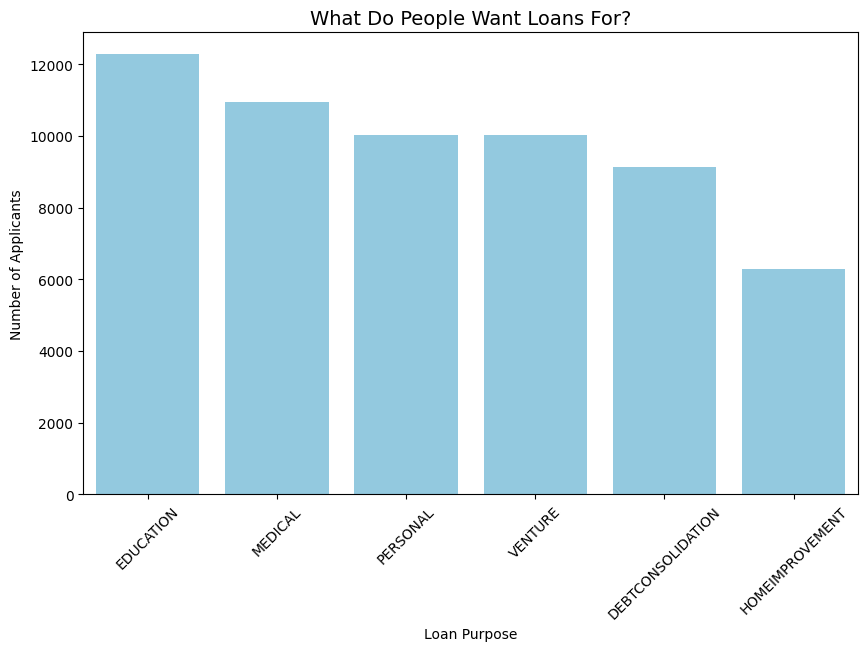

In [ ]:
#Bar Chart for Loan Purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='loan_intent', color='skyblue')
plt.title('What Do People Want Loans For?', fontsize=14)
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

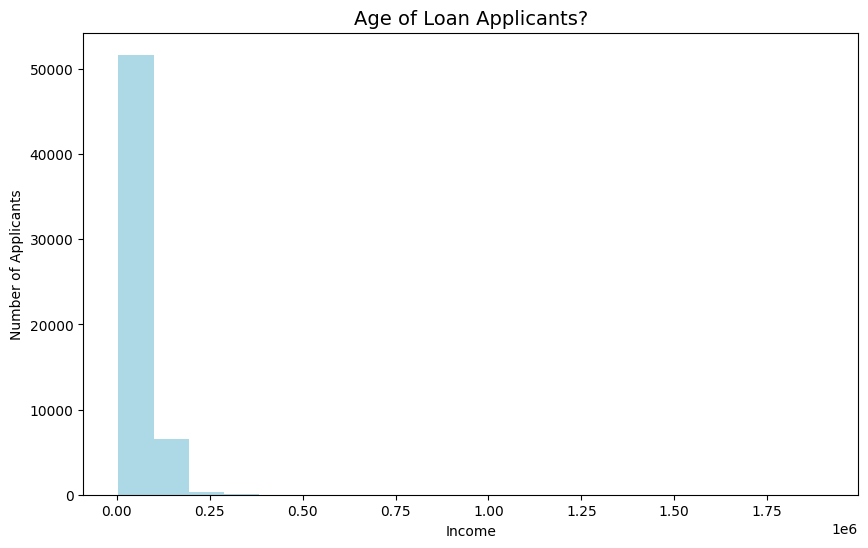

In [ ]:
#Histogram of Income Distributon
plt.figure(figsize=(10, 6))
plt.hist(train_df['person_income'], bins=20, color='lightblue')
plt.title('Age of Loan Applicants?', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Number of Applicants')
plt.show()

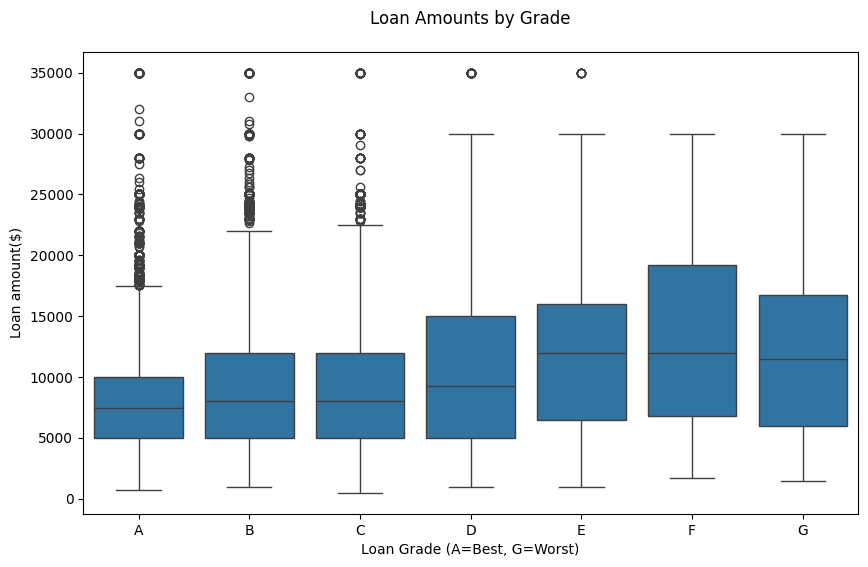

In [ ]:
#Loan Grade and Amounts Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_grade',
            y='loan_amnt',
            data=train_df,
            order=['A','B', 'C', 'D','E','F','G'])
plt.title('Loan Amounts by Grade', pad=20)
plt.xlabel('Loan Grade (A=Best, G=Worst)')
plt.ylabel('Loan amount($)')
plt.show()

visulizationing to better show prediction goal for model


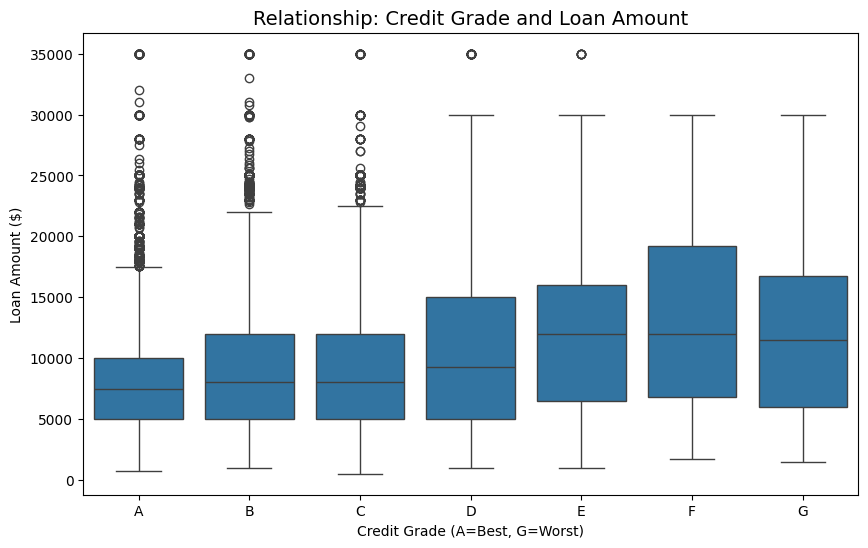

In [ ]:
#Credit Grade vs Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='loan_grade', y='loan_amnt',
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Relationship: Credit Grade and Loan Amount', fontsize=14)
plt.xlabel('Credit Grade (A=Best, G=Worst)')
plt.ylabel('Loan Amount ($)')
plt.show()

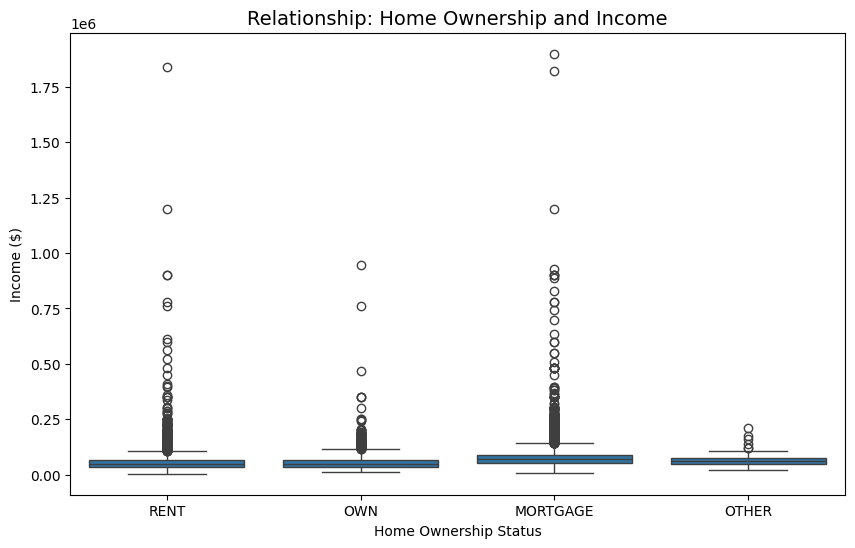

In [ ]:
#Home Ownership vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='person_home_ownership', y='person_income')
plt.title('Relationship: Home Ownership and Income', fontsize=14)
plt.xlabel('Home Ownership Status')
plt.ylabel('Income ($)')
plt.show()

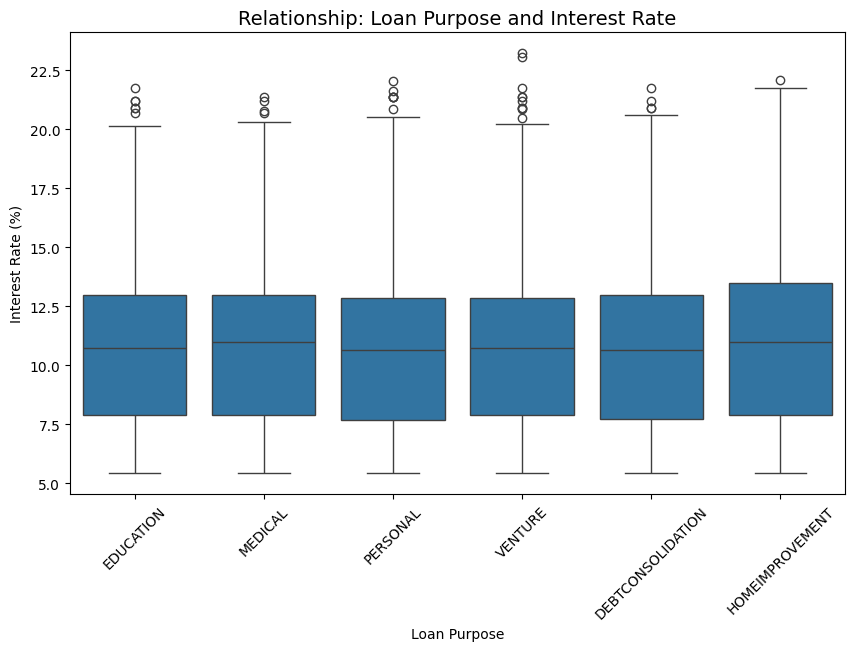

In [ ]:
#Loan Purpose vs Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='loan_intent', y='loan_int_rate')
plt.title('Relationship: Loan Purpose and Interest Rate', fontsize=14)
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)
plt.show()

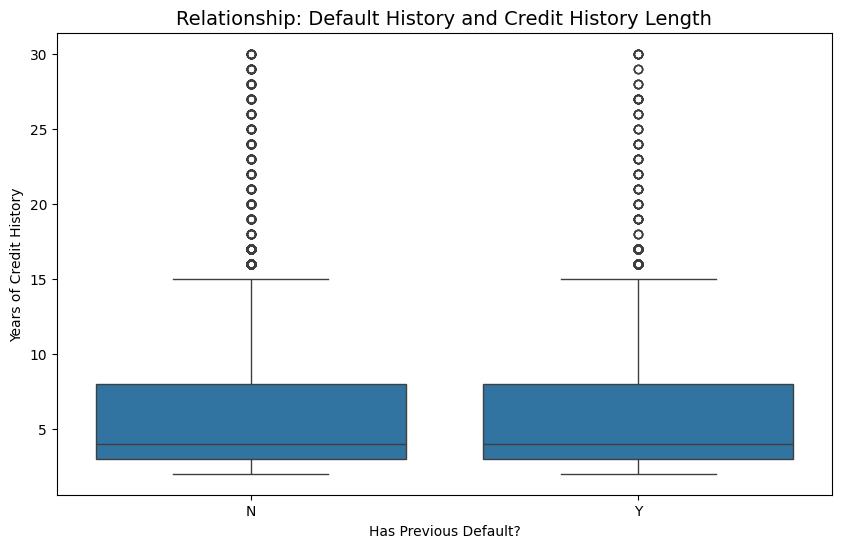

In [ ]:
#Default History vs Credit History Length
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='cb_person_default_on_file',
            y='cb_person_cred_hist_length')
plt.title('Relationship: Default History and Credit History Length', fontsize=14)
plt.xlabel('Has Previous Default?')
plt.ylabel('Years of Credit History')
plt.show()

# Converting All Data to a Numerical Represenation


Machine learning is all math, and math can only be done with numbers. Some of the features in our dataset are strings, and need to be converted to some kind of numerical representation so that we can actually use them as an input to our model.

In [ ]:
# combine the train and test data so I can manipulate both at the same time
all_df = pd.concat([train_df, test_df], axis=0)
all_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0


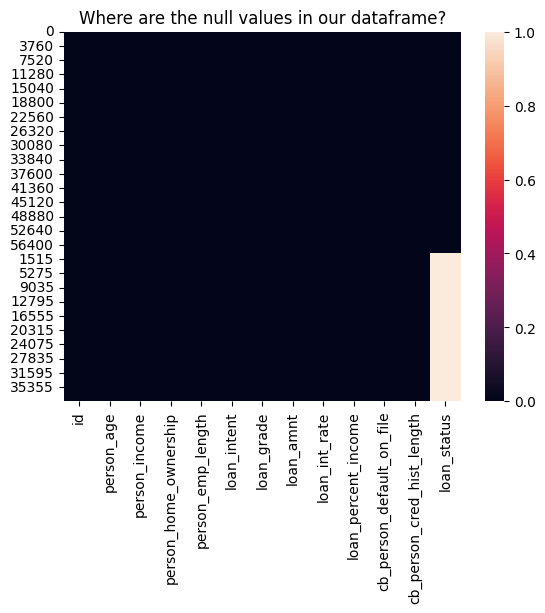

In [ ]:
# making sure the only null values are the column with the loan status
sns.heatmap(all_df.isna())
plt.title('Where are the null values in our dataframe?')
plt.show()

In [ ]:
# check the data types
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97743 entries, 0 to 39097
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          97743 non-null  int64  
 1   person_age                  97743 non-null  int64  
 2   person_income               97743 non-null  int64  
 3   person_home_ownership       97743 non-null  object 
 4   person_emp_length           97743 non-null  float64
 5   loan_intent                 97743 non-null  object 
 6   loan_grade                  97743 non-null  object 
 7   loan_amnt                   97743 non-null  int64  
 8   loan_int_rate               97743 non-null  float64
 9   loan_percent_income         97743 non-null  float64
 10  cb_person_default_on_file   97743 non-null  object 
 11  cb_person_cred_hist_length  97743 non-null  int64  
 12  loan_status                 58645 non-null  float64
dtypes: float64(4), int64(5), object(4)
m

Some of the features are not numbers, which is a problem. Let's take a look at the unique value counts for the non-numeric features.

In [ ]:
all_df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,50874
MORTGAGE,41507
OWN,5194
OTHER,168


In [ ]:
all_df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,20347
MEDICAL,18381
PERSONAL,16831
VENTURE,16643
DEBTCONSOLIDATION,15048
HOMEIMPROVEMENT,10493


In [ ]:
all_df['loan_grade'].value_counts()

,count
loan_grade,
A,34989
B,34004
C,18496
D,8303
E,1646
F,254
G,51


In [ ]:
all_df['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,83170
Y,14573


In [ ]:
##fix loan_intent to use grading based on success rate


# Assuming train_df is your DataFrame
# Group by 'loan_intent', calculate sum of 'loan_status' and total values for each 'loan_intent'
result = train_df.groupby('loan_intent').apply(lambda group: group['loan_status'].sum() / len(group)).reset_index(name='loan_status_ratio')



loan_intent_to_vals = result.set_index('loan_intent')['loan_status_ratio'].to_dict()

# Display the dictionary
print(loan_intent_to_vals)


{'DEBTCONSOLIDATION': 0.18931347859410927, 'EDUCATION': 0.10773368103659034, 'HOMEIMPROVEMENT': 0.17372611464968152, 'MEDICAL': 0.17825132613865008, 'PERSONAL': 0.13278753993610223, 'VENTURE': 0.09279792228548596}


<ipython-input-26-e892c40a6c57>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = train_df.groupby('loan_intent').apply(lambda group: group['loan_status'].sum() / len(group)).reset_index(name='loan_status_ratio')


In [ ]:
# get list of the columns with strings as values

features_as_strings = []

for column in all_df.columns:
  if all_df[column].dtype == 'object' and column != 'loan_grade' and column != 'loan_intent':
    features_as_strings.append(column)

features_as_strings

['person_home_ownership', 'cb_person_default_on_file']

In [ ]:
# One hot encoding
##change this method to convert to of success based on vals (school -> 0.5 etc)

# make a copy of the full dataframe so we don't screw up the data
all_df_numeric = all_df.copy()

for feature_as_string in features_as_strings:
  # extract the non-numeric feature values
  feature = all_df_numeric[feature_as_string]

  # get the unique non-numeric values
  unique_values = feature.unique()

  # iterate over unique, non-numeric values and add a new, one-hot-encoded column
  for unique_value in unique_values:
    # format of new column name is the original column name + the unique non-numeric value
    new_column_name = feature_as_string + '_' + unique_value

    # this is a little hack to turn an array of booleans into 1's and 0's
    new_feature_values = (feature == unique_value).astype(int)

    # add our new, numeric column to the dataframe
    all_df_numeric[new_column_name] = new_feature_values

  # remove the old, non-numeric column
  all_df_numeric.drop(columns=feature_as_string, inplace=True)



##loan grade conversion
#print(all_df_numeric['loan_grade'].unique())
numeric_loan_grades = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
all_df_numeric['loan_grade'] = all_df_numeric['loan_grade'].map(numeric_loan_grades)

all_df_numeric['loan_intent'] = all_df_numeric['loan_intent'].map(loan_intent_to_vals)



In [ ]:
# make sure all our columns are numeric and check the column names
all_df_numeric.info()
all_df_numeric['loan_intent'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 97743 entries, 0 to 39097
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97743 non-null  int64  
 1   person_age                      97743 non-null  int64  
 2   person_income                   97743 non-null  int64  
 3   person_emp_length               97743 non-null  float64
 4   loan_intent                     97743 non-null  float64
 5   loan_grade                      97743 non-null  int64  
 6   loan_amnt                       97743 non-null  int64  
 7   loan_int_rate                   97743 non-null  float64
 8   loan_percent_income             97743 non-null  float64
 9   cb_person_cred_hist_length      97743 non-null  int64  
 10  loan_status                     58645 non-null  float64
 11  person_home_ownership_RENT      97743 non-null  int64  
 12  person_home_ownership_OWN       97743

,loan_intent
0,0.107734
1,0.178251
2,0.132788
3,0.092798
4,0.178251


In [ ]:
# separate the train and test datasets
is_train = ~all_df_numeric['loan_status'].isna()

df_train_numeric = all_df_numeric.loc[is_train]

df_test_numeric = all_df_numeric.loc[~is_train]

In [ ]:
# extract the training featues, train target values, and test features into their own dataframes
X_train = df_train_numeric.drop(columns='loan_status').copy()
y_train = df_train_numeric['loan_status'].copy()

X_test = df_test_numeric.drop(columns='loan_status').copy()

In [ ]:
# checking the shapes of our new dataframes
X_train.shape, y_train.shape, X_test.shape

((58645, 16), (58645,), (39098, 16))

In [ ]:
#CHANGE ONE HOT ENCODING ABOVE TO ENCODE BASED ON PROBS
# data augmentation
  # feature fuzziness (+- 10%)
  # test time augmentation
  # prolly split into val and train (to get better idea of effectiveness of ideas)
  # other ideas??


# Build and Evaluate Model

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
##account for class imbalance

def calculate_class_weights(y):
    """
    Calculate the scale_pos_weight parameter for XGBoost.
    This weight balances the classes by setting the weight of the positive class
    proportional to the imbalance in the dataset.
    """
    neg_class = np.sum(y == 0)
    pos_class = np.sum(y == 1)
    return neg_class / pos_class if pos_class > 0 else 1




   # XGBoost parameters
    max_depth = trial.suggest_int('max_depth', 4, 8)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    
    # Augmentation parameters
    aug_prob = trial.suggest_float('augProb', 0.0, 0.5)
    aug_amt = trial.suggest_float('augAmt', 0.0, 0.25)

In [ ]:
import optuna
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random


def calculate_class_weights(y):
    """
    Calculate the scale_pos_weight parameter for XGBoost.
    This weight balances the classes by setting the weight of the positive class
    proportional to the imbalance in the dataset.
    """
    neg_class = np.sum(y == 0)
    pos_class = np.sum(y == 1)
    return neg_class / pos_class if pos_class > 0 else 1


# Define the function to apply augmentation
def apply_feature_fuzziness(row, aug_prob, aug_amt):
    """
    Apply fuzziness to two randomly selected features in the row based on the given aug_prob and aug_amt.
    """
    # Exclude 'loan_status' from the list of features to modify
    excluded_features = ['loan_status']

    # Separate int and float features excluding 'loan_status'
    int_features = [col for col in row.index if row[col].dtype == 'int64' and col not in excluded_features]
    float_features = [col for col in row.index if row[col].dtype == 'float64' and col not in excluded_features]

    # Decide whether to apply augmentation based on aug_prob
    if random.random() < aug_prob:
        # Select two features (could be from either int or float type)
        selected_features = random.sample(int_features + float_features, 2)

        for feature in selected_features:
            value = row[feature]
            if isinstance(value, int):
                # For int features, add or subtract based on aug_amt
                row[feature] = value + random.choice([-1, 1]) * aug_amt
            elif isinstance(value, float):
                # For float features, add or subtract 10% of the original value based on aug_amt
                fuzziness = value * aug_amt
                row[feature] = value + random.choice([-fuzziness, fuzziness])
    return row


# Define the Optuna objective function
def objective(trial):
    # XGBoost parameters
    max_depth = trial.suggest_int('max_depth', 4, 8)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Augmentation parameters
    aug_prob = trial.suggest_float('augProb', 0.0, 0.5)
    aug_amt = trial.suggest_float('augAmt', 0.0, 0.25)

    # Split the dataset into training and validation
    X_train, X_val, y_train, y_val = train_test_split(df_train_numeric.drop(columns=['loan_status']),
                                                      df_train_numeric['loan_status'],
                                                      test_size=0.2, random_state=42)

    # Calculate class weights
    scale_pos_weight = calculate_class_weights(y_train)

    # Apply augmentation to the training set with the given augmentation probability and amount
    augmented_X_train = X_train.copy()
    augmented_X_val = X_val.copy()

    for i, row in augmented_X_train.iterrows():
        augmented_X_train.loc[i] = apply_feature_fuzziness(row, aug_prob, aug_amt)

    # Prepare XGBoost DMatrix
    dtrain = xgb.DMatrix(augmented_X_train, label=y_train)
    dval = xgb.DMatrix(augmented_X_val, label=y_val)

    # Set XGBoost parameters
    params = {
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'scale_pos_weight': scale_pos_weight  # Add class weighting
    }

    # Train the XGBoost model with early stopping
    evals = [(dval, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50, verbose_eval=False)

    # Predict on the validation set
    y_pred = model.predict(dval)

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_val, y_pred)

    return roc_auc  # Return the ROC-AUC score as the objective


# Create an Optuna study to optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best trial (best parameters and model)
best_trial = study.best_trial
print(f"Best trial: {best_trial.params}")
print(f"Best ROC-AUC: {study.best_value}")

# Save the model with the best parameters
best_params = best_trial.params
dtrain = xgb.DMatrix(df_train_numeric.drop(columns=['loan_status']),
                     label=df_train_numeric['loan_status'])
best_model = xgb.train(best_params, dtrain, num_boost_round=1000)
best_model.save_model('best_xgboost_model_with_roc_auc.json')
print("Best model saved to 'best_xgboost_model_with_roc_auc.json'")


[I 2024-11-25 02:18:03,513] A new study created in memory with name: no-name-bec54cbd-ca3a-421d-a9b4-fc71a5065447
<ipython-input-39-6fdc583e1439>:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11586.43330551486' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  augmented_X_train.loc[i] = apply_feature_fuzziness(row, aug_prob, aug_amt)
<ipython-input-39-6fdc583e1439>:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.57555277139258' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  augmented_X_train.loc[i] = apply_feature_fuzziness(row, aug_prob, aug_amt)
<ipython-input-39-6fdc583e1439>:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8081490762024732' has dt

In [ ]:
## train model one more time based on params

In [ ]:
##create train_pred

In [ ]:


def evaluate_accuracy(train_pred, y_train, threshold=0.5):
    """
    Evaluates the accuracy of the predictions against the true labels.

    Parameters:
    - train_pred: Array-like, the predicted probabilities (1D array for binary classification)
    - y_train: Array-like, the true labels (binary values: 0 or 1)
    - threshold: The decision threshold for classifying the prediction. Default is 0.5.

    Returns:
    - accuracy: The accuracy of the model on the training set.
    """
    # Convert probabilities to binary predictions using the threshold
    binary_predictions = (train_pred >= threshold).astype(int)

    # Calculate accuracy by comparing the binary predictions with the true labels
    accuracy = np.mean(binary_predictions == y_train)

    return accuracy

print(f"Train acc: {evaluate_accuracy(train_pred, y_train, 0.5)}")


Train acc: 0.9879880403927591


In [ ]:
# ... but this is the metric that Kaggle wants us to use
from sklearn.metrics import roc_auc_score

In [ ]:
# calculate the score for AUROC which is what kaggle actually wants

auroc = roc_auc_score(y_train, train_pred)

auroc

0.9991277633197849

In [ ]:
# manually calculate true positive and false positive rates for different decision values
# so I can plot the ROC curve

true_positives = []
false_positives = []

# if greater than this value, classify as a positive sample (they got approved for the loan)
decision_values = np.linspace(0, 1, 1000)



for decision_value in tqdm(decision_values):
  # classify samples using decision value
  y_out = (train_pred > decision_value).astype(int)

  # calculate percentage of true positive classifications
  p_true_positive = np.mean((y_out[y_train == 1] == y_train[y_train == 1]).astype(int))

  true_positives.append(p_true_positive)

  # false positive rate is the 1 - true negative rate
  p_false_positive =  1 - np.mean((y_out[y_train == 0] == y_train[y_train == 0]).astype(int))

  false_positives.append(p_false_positive)

100%|██████████| 1000/1000 [00:16<00:00, 59.47it/s]


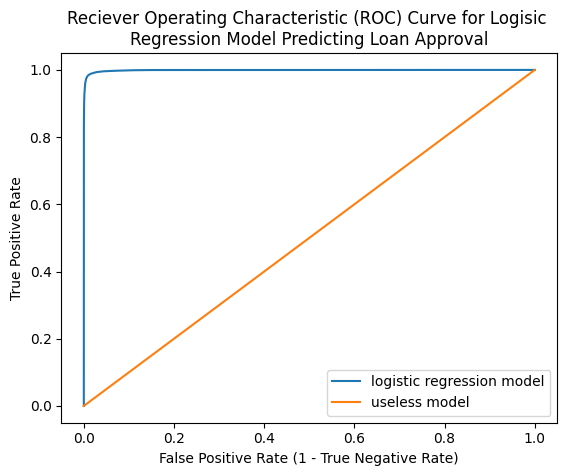

In [ ]:
# plot ROC curve
plt.plot(false_positives, true_positives, label='logistic regression model')
plt.plot(decision_values, decision_values, label='useless model')
plt.xlabel('False Positive Rate (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve for Logisic \nRegression Model Predicting Loan Approval')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Raw Class Probabilities for Logistic\n Regression Model Classifying Denied / Approved Loans')

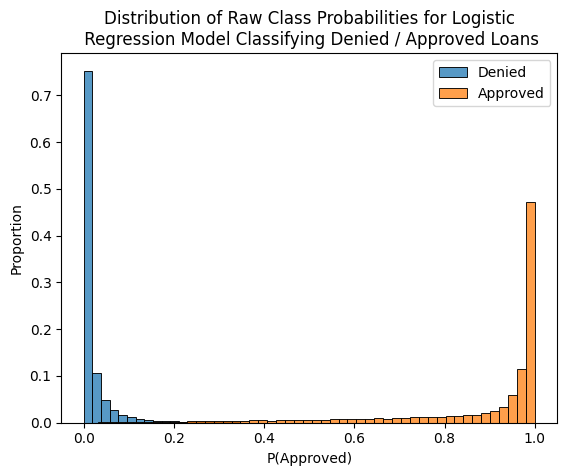

In [ ]:
# plotting the distributions of class probabilites predicted by the model for positive (approved) and negative (denied) samples
sns.histplot(x=train_pred[y_train == 0], stat='proportion', bins=50)
sns.histplot(x=train_pred[y_train == 1], stat='proportion', bins=50)
plt.legend(['Denied', 'Approved'])
plt.xlabel('P(Approved)')
plt.title('Distribution of Raw Class Probabilities for Logistic\n Regression Model Classifying Denied / Approved Loans')

^^ The AUC plot is created by applying a vertical line to this plot at all values in [0, 1] and calculating the True positive and false positive rates

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# get the actual output of the model which will automatically apply a decision based on 0.5
# aka if p > 0.5, classify as positive (approved), else classify as negative (denied)
y_out = train_pred > 0.5

conf_mat = confusion_matrix(y_train, y_out, normalize = 'true')

conf_mat

array([[0.9988829 , 0.0011171 ],
       [0.07754353, 0.92245647]])

Text(0.5, 1.0, 'Confusion Matrix for Loan Approval Classification Model (Normalized by True Labels)')

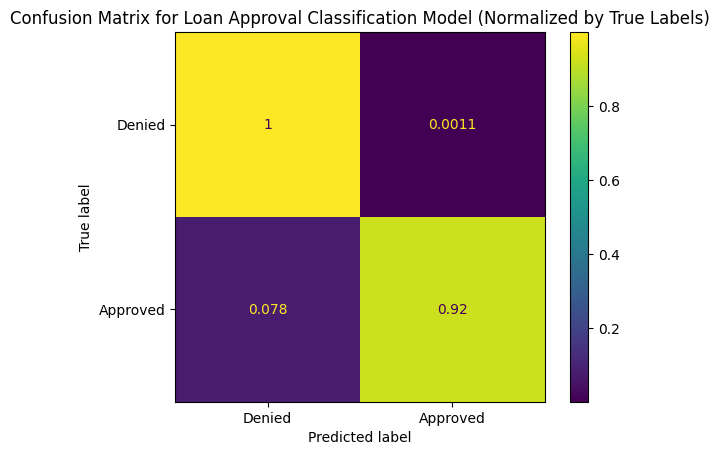

In [ ]:
# plot confusion matrix
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['Denied', 'Approved'])
disp.plot()
plt.title('Confusion Matrix for Loan Approval Classification Model (Normalized by True Labels)')

# Make Predictions on Test Dataset and Save Data to a CSV



In [ ]:
##saving data to csv
##input (output from model predictions) =
##output of this cell is csv that fits into kaggle format

# Generate predictions for the test set
y_pred_proba = model.predict(xgb.DMatrix(X_test))

# Create a submission dataframe
submission_df = pd.DataFrame({
    'id': test_df['id'],  # Use the IDs from original test_df
    'loan_status': y_pred_proba  # Predicted probabilities
})

# Save to CSV file without index
# use index=False because kaggle doesn't want that extra column
submission_df.to_csv('submission.csv', index=False)

# Verify the first few rows of the submission file
print("First few rows of submission file:")
print(submission_df.head())

# Verify the shape
print("\nSubmission shape:", submission_df.shape)

First few rows of submission file:
      id  loan_status
0  58645     0.999814
1  58646     0.021219
2  58647     0.925348
3  58648     0.001903
4  58649     0.048899

Submission shape: (39098, 2)
